In [ ]:

from utils.readwritendarray import extractimagesdescriptor, readfilendarray

# Bib joblib, Numpy,skimage,glob,re
import numpy as np


# Standart Scale, SVC and KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

import pickle

In [77]:
#GLCM
distances=[2,4,8,16,32,64,70]
angles=np.deg2rad([90,180,270])


#LBP
Winsize=10
decorr=1

DESCRIPTOR="GLCM"
RUN=False

if RUN:
    function_glcm=extractimagesdescriptor("DadosExtraidos/X_TreinoGLCM.txt",descriptor="GLCM")
    function_glcm(angles=angles,distances=distances)

    function_lpq=extractimagesdescriptor(filename="DadosExtraidos/X_TreinoLPQ.txt",descriptor="LPQ")
    function_lpq()

    function_lbp=extractimagesdescriptor(filename="DadosExtraidos/X_TreinoLBP.txt",descriptor="LBP")
    function_lbp(winSize=Winsize,decorr=decorr)

X_lbp=readfilendarray(filename="DadosExtraidos/X_TreinoLBP.txt")

X_glcm=readfilendarray(filename="DadosExtraidos/X_TreinoGLCM.txt")

X_lpq=readfilendarray(filename="DadosExtraidos/X_TreinoLPQ.txt")

y=readfilendarray(filename="DadosExtraidos/Y_Resultado.txt",data="s")


In [78]:
CVPARTS=5 # number of CV parts

pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("model",SVC(kernel="rbf"))]) 
parameters={
    "model__C":[1000,1000,10000],
    "model__gamma":["auto","scale"]
}

svm=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [79]:
if DESCRIPTOR=="GLCM":
    svm.fit(X=X_glcm,y=y)
elif DESCRIPTOR=="LBP":
    svm.fit(X=X_lbp,y=y)
elif DESCRIPTOR=="LPQ":
    svm.fit(X=X_lpq,y=y)

In [80]:
if DESCRIPTOR=="GLCM":
    ypred=svm.predict(X=X_glcm)
elif DESCRIPTOR=="LBP":
    ypred=svm.predict(X=X_lbp)
elif DESCRIPTOR=="LPQ":
    ypred=svm.predict(X=X_lpq)

svm.best_params_

{'model__C': 10000, 'model__gamma': 'auto'}

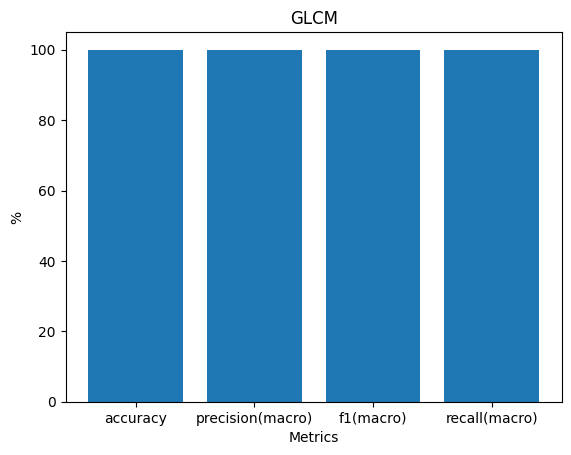

In [81]:
metrics=[accuracy_score(y_true=y,y_pred=ypred)*100,
         precision_score(y_true=y,y_pred=ypred,average='macro')*100,
         f1_score(y_true=y,y_pred=ypred,average='macro')*100,
         recall_score(y_true=y,y_pred=y,average='macro')*100]

label=["accuracy","precision(macro)","f1(macro)","recall(macro)"]

plt.bar(x=label,height=metrics)

plt.xlabel("Metrics")
plt.ylabel("%")
plt.title(DESCRIPTOR)
plt.show()

In [82]:
print(classification_report(y,y_pred=ypred))

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



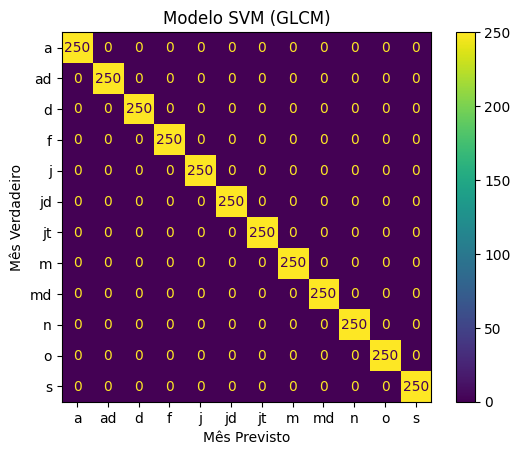

In [83]:
#Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y,ypred)

plt.title("Modelo SVM"+" "+"("+DESCRIPTOR+")")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")

plt.show()



In [84]:
CVPARTS=5 # number of CV parts

pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("knn",KNeighborsClassifier())]) 
parameters={
    "knn__n_neighbors":[1,2,3,4,7,8,9],
    "knn__weights":['uniform', 'distance']
}

knnglcm=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)


In [85]:
CVPARTS=5 # number of CV parts

pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("knn",KNeighborsClassifier())]) 
parameters={
    "knn__n_neighbors":[1,2,3,4,7,8,9],
    "knn__weights":['uniform', 'distance']
}

knnlpq=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [86]:
CVPARTS=5 # number of CV parts

pipe=Pipeline(steps=[("scalar",StandardScaler()),
                     ("knn",KNeighborsClassifier())]) 
parameters={
    "knn__n_neighbors":[1,2,3,4,7,8,9],
    "knn__weights":['uniform', 'distance']
}

knnlbp=GridSearchCV(estimator=pipe,
                    param_grid=parameters,
                    scoring="f1_macro",
                    cv=CVPARTS,n_jobs=-1)

In [87]:
knnglcm.fit(X=X_glcm,y=y)
knnlbp.fit(X=X_lbp,y=y)
knnlpq.fit(X=X_lpq,y=y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 7, 8, 9],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [88]:
ypredknnglcm=knnglcm.predict(X=X_glcm)
ypredknnlbp=knnlbp.predict(X=X_lbp)
ypredknnlpq=knnlpq.predict(X=X_lpq)


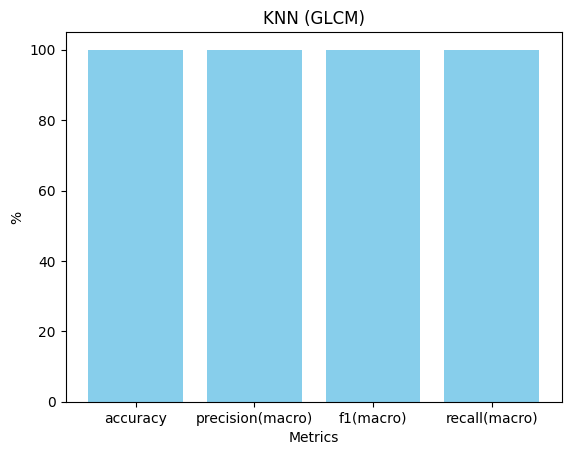

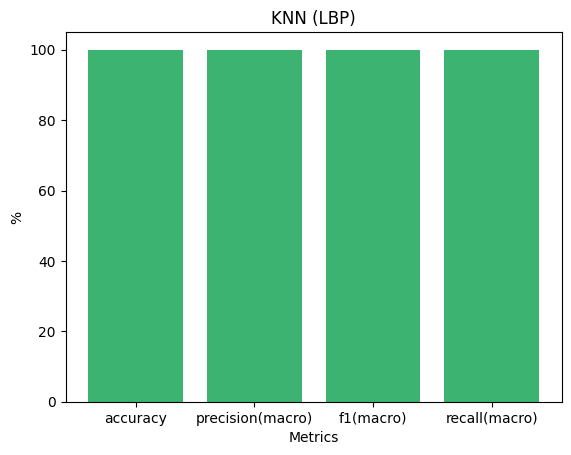

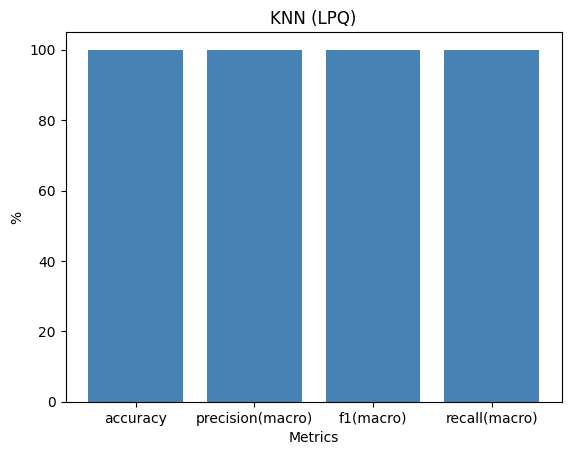

In [89]:
metricsglcm=[accuracy_score(y_true=y,y_pred=ypredknnglcm)*100,
         precision_score(y_true=y,y_pred=ypredknnglcm,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredknnglcm,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredknnglcm,average='macro')*100]

metricslbp=[accuracy_score(y_true=y,y_pred=ypredknnlbp)*100,
         precision_score(y_true=y,y_pred=ypredknnlbp,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredknnlbp,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredknnlbp,average='macro')*100]

metricslpq=[accuracy_score(y_true=y,y_pred=ypredknnlpq)*100,
         precision_score(y_true=y,y_pred=ypredknnlpq,average='macro')*100,
         f1_score(y_true=y,y_pred=ypredknnlpq,average='macro')*100,
         recall_score(y_true=y,y_pred=ypredknnlpq,average='macro')*100]

label=["accuracy","precision(macro)","f1(macro)","recall(macro)"]


plt.bar(x=label,height=metricsglcm,color="skyblue")


plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("KNN (GLCM)")
plt.show()

plt.bar(x=label,height=metricslbp,color='mediumseagreen')

plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("KNN (LBP)")
plt.show()

plt.bar(x=label,height=metricslpq,color="steelblue")

plt.xlabel("Metrics")
plt.ylabel("%")
plt.title("KNN (LPQ)")

plt.show()


In [90]:
print("\tKNN (GLCM) \n")
print(classification_report(y,y_pred=ypredknnglcm)+"\n")


	KNN (GLCM) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




In [91]:
print("\tKNN (LPQ) \n")
print(classification_report(y,y_pred=ypredknnlpq)+"\n")

	KNN (LPQ) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




In [92]:
print("\tKNN (LBQ) \n")
print(classification_report(y,y_pred=ypredknnlbp)+"\n")

	KNN (LBQ) 

              precision    recall  f1-score   support

           a       1.00      1.00      1.00       250
          ad       1.00      1.00      1.00       250
           d       1.00      1.00      1.00       250
           f       1.00      1.00      1.00       250
           j       1.00      1.00      1.00       250
          jd       1.00      1.00      1.00       250
          jt       1.00      1.00      1.00       250
           m       1.00      1.00      1.00       250
          md       1.00      1.00      1.00       250
           n       1.00      1.00      1.00       250
           o       1.00      1.00      1.00       250
           s       1.00      1.00      1.00       250

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000




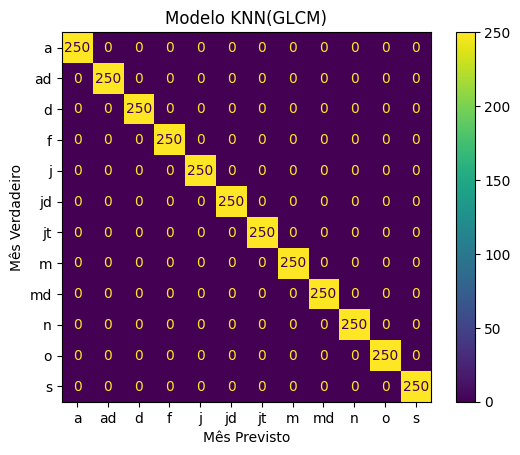

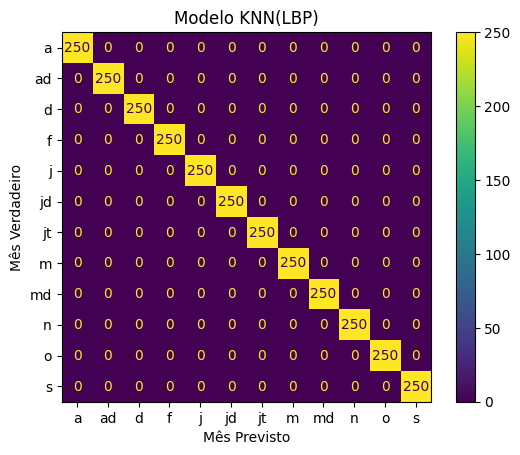

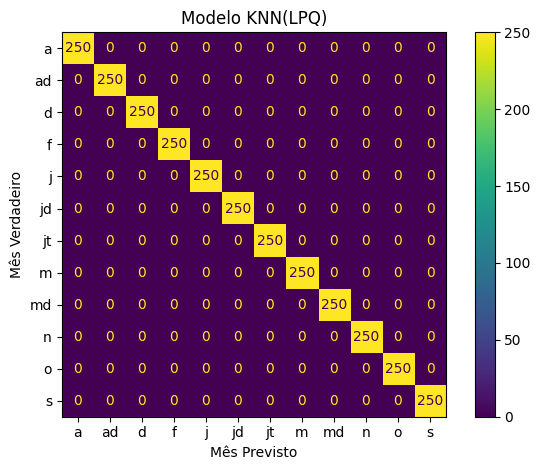

In [93]:
#Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y,ypredknnglcm)

plt.title("Modelo KNN(GLCM)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")


ConfusionMatrixDisplay.from_predictions(y,ypredknnlpq)

plt.title("Modelo KNN(LBP)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")

ConfusionMatrixDisplay.from_predictions(y,ypredknnlpq)

plt.title("Modelo KNN(LPQ)")

plt.xlabel("Mês Previsto")

plt.ylabel("Mês Verdadeiro")

plt.tight_layout()


In [94]:
with open(f"Models/svm_{DESCRIPTOR}.pkl",mode="wb") as fsvm:
    pickle.dump(svm,fsvm)

with open(f"Models/knn_GLCM.pkl",mode="wb") as fknn:
    pickle.dump(knnglcm,fknn)

with open(f"Models/knn_LBP.pkl",mode="wb") as fknn:
    pickle.dump(knnlbp,fknn)

with open(f"Models/knn_LPQ.pkl",mode="wb") as fknn:
    pickle.dump(knnlpq,fknn)